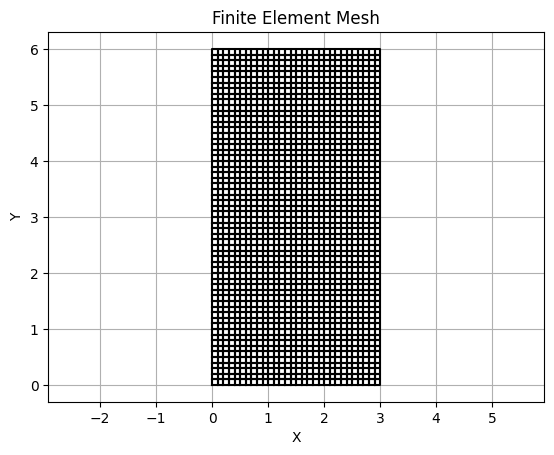

In [72]:
# THIS THE MAIN FE CODE #

import numpy as np
import math
from QuadrilateralMesh import QuadrilateralMesh  
from PlotMesh import PlotMesh
from solution import solution


tol = 1e-5 # tolerance for zero

## GEOMETRICAL PROPERTIES ##

Lx = 3
Ly = 6
h = 0.01 # Plate thickness

nx = 30 # number of division in x-direction
ny = 60 # number of division in y-direction

dx = Lx/nx # mesh size in x-direction
dy = Ly/ny # mesh size in y-direction


xy,elNode,nE,nP = QuadrilateralMesh(Lx,Ly,nx,ny) # discretizing the boundary

nDof = 2*nP # total number of degrees of freedom

PlotMesh(xy,elNode) # Plotting the mesh









In [73]:
# ## MATERIAL PROPERTIES ##
E = 2e11  # elastic modulus
pois = 0.270 # Poisson's ratio
dens = 7850 # mass density


In [74]:
# BOUNDARY CONDITIONS #
left_boundary = np.where(xy[:, 0] == 0)     # left boundary
fixed_dofs = np.vstack([left_boundary[0], left_boundary[0]+nP]) # fixed degrees of freedom


In [75]:
# FORCE VECTOR #
# generate a code that applies distributed force on right boundary and transform the distributed force into nodal force
fx = 50e8 # distributed force in x-direction
fy = 0 # distributed force in y-direction

force = np.zeros(2*nP) # initialize force vector

right_boundary = np.where(xy[:, 0] >= Lx-tol)     # right boundary


# convert distributed force into nodal force
force[right_boundary] = fx*dy
force[right_boundary[0][0]] = fx*dy/2
force[right_boundary[0][-1]] = fx*dy/2




In [76]:
# CONSTITUTIVE MATRIX #
C = np.array([[1, pois, 0],
              [pois, 1, 0],
              [0, 0, (1-pois)/2]])
C *= E / (1 - pois**2)


In [77]:
# STIFFNESS MATRIX #
from StiffnessQuad import StiffnessMatrix 
xy = np.round(xy, 4)

stiff,mass, strainDispMat = StiffnessMatrix(nDof,nE,elNode,nP,xy,C,dens,h) # compute stiffness matrix



In [78]:
disp = solution(nDof,fixed_dofs,stiff,force) # solve for displacement

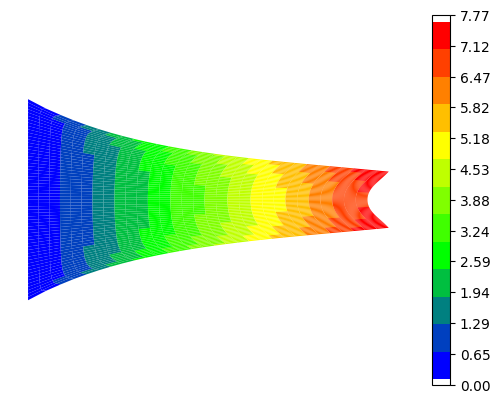

In [79]:
import matplotlib.tri as tri
import matplotlib.pyplot as plt

# Assuming xy, ux, uy, and elNode are already defined
scale = 1
xy_NewFEM = xy + scale * np.column_stack((ux, uy))
min_u_FEM = np.min(ux)
max_u_FEM = np.max(ux)
# Assuming the first column is unnecessary
elNode_corrected = elNode[:, 1:]

from PlotFieldonMesh import PlotFieldonMesh
PlotFieldonMesh(xy_NewFEM,elNode,ux,min_u_FEM,max_u_FEM)

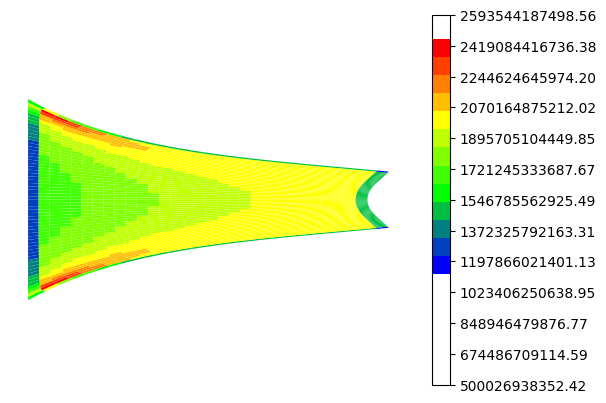

In [80]:
from CalculateStress import CalculateStress
Sxx_node_FEM, Syy_node_FEM, Sxy_node_FEM = CalculateStress(nE,nP,elNode,disp,xy,C)

von_misses_stresses = np.sqrt(Sxx_node_FEM**2 - Sxx_node_FEM * Syy_node_FEM + Syy_node_FEM**2 + 3 * Sxy_node_FEM**2)


min_von_misses = np.min(von_misses_stresses)
max_von_misses = np.max(von_misses_stresses)

PlotFieldonMesh(xy_NewFEM,elNode,von_misses_stresses.flatten(),min_von_misses,max_von_misses)



